<a href="https://colab.research.google.com/github/biancabrag/ibovespa/blob/main/Ibovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Loading!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import prophet as p

Hey :) first of all, we wanted to say that in our prior version of this notebook, we used a local document saved on our computer, but the computer *fried* and we lost everything! So now, with the experience, we decided to import the same csv file from a google drive folder, which will make everyone's lives easier from now on - all you gotta do, is hit the runtime run all button!

Now we are installing our 'gdown' package to make it possible for us to import our files.

In [ ]:
!pip install gdown

In [ ]:
import gdown


file_id = '1-ZhedV6ojkVeh-zApGGyivag-4u8NIVQ'
# URL
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'seu_arquivo.csv', quiet=False)
# Uploading the csv
dados = pd.read_csv('seu_arquivo.csv')




Downloading...
From: https://drive.google.com/uc?id=1-ZhedV6ojkVeh-zApGGyivag-4u8NIVQ
To: /content/seu_arquivo.csv
100%|██████████| 34.6k/34.6k [00:00<00:00, 39.4MB/s]

         DATA ABERTURA  FECHAMENTO VARIAÇÃO   MÍNIMO   MÁXIMO VOLUME
0  02/01/2024  134.186     132.697    -1,11  132.095  134.195    n/d
1  28/12/2023  134.194     134.185    -0,01  133.832  134.392    n/d
2  27/12/2023  133.523     134.194     0,49  133.328  134.195    n/d
3  26/12/2023  132.753     133.533     0,59  132.753  133.645    n/d
4  22/12/2023  132.182     132.753     0,43  132.094  133.035    n/d


In [ ]:
dados.head()

,DATA,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME
0,02/01/2024,134.186,132.697,"-1,11",132.095,134.195,n/d
1,28/12/2023,134.194,134.185,"-0,01",133.832,134.392,n/d
2,27/12/2023,133.523,134.194,"0,49",133.328,134.195,n/d
3,26/12/2023,132.753,133.533,"0,59",132.753,133.645,n/d
4,22/12/2023,132.182,132.753,"0,43",132.094,133.035,n/d


Our data starts at January the second in 2018, and finishes at January the second in 2024.

By looking at the data we got, and assuming all we want is the closing value, we will get rid of the unrelevant columns and stick to the 'FECHAMENTO' column, which we will rename right after.

In [ ]:
dados = dados.drop(columns={'ABERTURA', 'MÁXIMO', 'MÍNIMO', 'VOLUME', 'VARIAÇÃO'})

In [ ]:
dados.head()

,DATA,FECHAMENTO
0,02/01/2024,132.697
1,28/12/2023,134.185
2,27/12/2023,134.194
3,26/12/2023,133.533
4,22/12/2023,132.753


In [ ]:
dados.rename(columns={'FECHAMENTO': 'y', 'DATA':'ds'}, inplace=True)

In [ ]:
dados.head()

,ds,y
0,02/01/2024,132.697
1,28/12/2023,134.185
2,27/12/2023,134.194
3,26/12/2023,133.533
4,22/12/2023,132.753


Right now, the 'ds' column is our index and the 'y' column is our target. This naming structure in our dataframe was set to make it possible for us to apply a 'Prophet' prediction model. If 'ds' being an index doesn't work, we'll reset our index and make it a regular column as well. Anyways, first we have to transform this one in a 'datetime' column.

In [ ]:
dados['ds'] = pd.to_datetime(dados['ds'], dayfirst=True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1488 non-null   datetime64[ns]
 1   y       1488 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.4 KB


After conversion of the index column to datetime, now we are ready to plot our data to see if some insights might pop up. Quick observation: apparently, our 'ds' column is no longer our index, and it has become a regular column and the index was replaced by a common range(0,1,2...n).

## Ploting with Seaborn and Quick Insights

Firstly, I will determine a fixed size for my plots and its fonts-size.

In [ ]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['font.size']=15

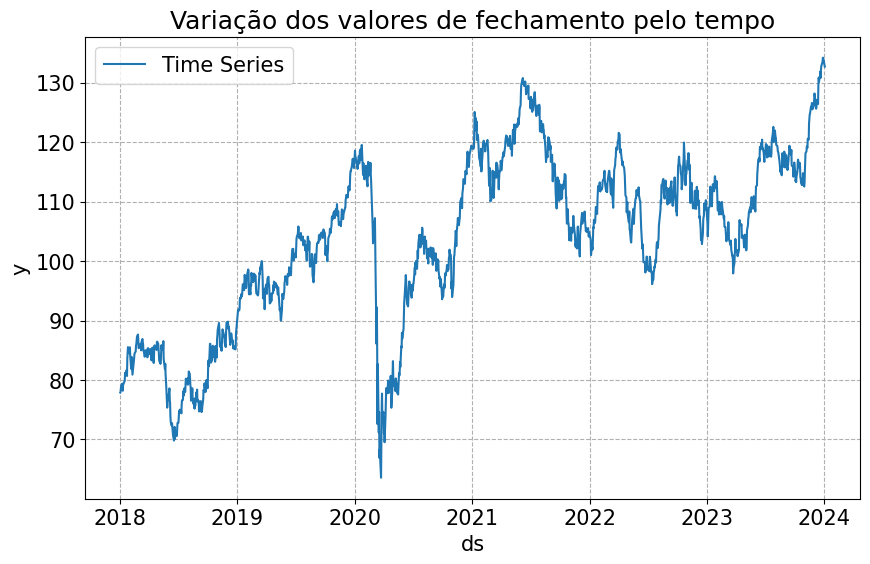

In [ ]:
sns.lineplot(x='ds', y='y', data=dados, label='Time Series')
plt.grid(linestyle='--')
plt.title('Variação dos valores de fechamento pelo tempo')
plt.show()

Right after our first plot, we can notice some ups and downs in the IBOVESPA stock value. It is expected, as we are talking about volatile prices, that suffer great influence by everything major that might happen in the world. In this particular case, we have one major drop in the value: around 2020 - and one might assume it is related to the pandemic, naturally.

Just to make sure we aren't doing any of this 'by hand', let's just check and see the dates where the stock value in our database hit rock-bottom and sky-high.

In [ ]:
print('Máximo: ', dados['y'].max())
print('Mínimo: ', dados['y'].min())

Máximo:  134.194
Mínimo:  63.57


Reseting the index by putting our datetime column as index('ds').

In [ ]:
dados = dados.set_index('ds')

In [ ]:
dados.head()

,y
ds,
2024-01-02,132.697
2023-12-28,134.185
2023-12-27,134.194
2023-12-26,133.533
2023-12-22,132.753


In [ ]:
max_date = dados['y'].idxmax()
print(max_date)

2023-12-27 00:00:00


In [ ]:
min_date = dados['y'].idxmin()
print(min_date)

2020-03-23 00:00:00


After our double-checking-code above, we have, indeed, confirmed that the sky-high prices were in 2023, December 27, and they hit rock-bottom in 2020, March 23. That is consistent with our plot, at least just by looking at it.

 Either way, the focus on this assignment is to try and develop a machine learning project that will fit as well as possible to our T-Series. Let's keep going!

## Scaling our data with MinMaxScaler()

Our data varies, as it is expected. Therefore, to reach the best model we could possibly get, considering our ressources, it is a good practice to, in that case, scale our data with Sklearn's MinMaxScaler(). By doing that, instead of having stock values that fluctuate from 60 to 120, for instance, we can limit the mininum to 0 and the maximum to 1. That will also make it easy for us when applying a Deep Learning model in the future.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dados_normalized = dados.copy()
dados_normalized['y'] = scaler.fit_transform(dados_normalized[['y']])

print(dados_normalized.head())


                   y
ds                  
2024-01-02  0.978803
2023-12-28  0.999873
2023-12-27  1.000000
2023-12-26  0.990641
2023-12-22  0.979596


Let's print our new 'y' column just to check if it has become an array with 0 as a minimum and 1 as a maximum.

In [ ]:
dados_normalized['y']

ds
2024-01-02    0.978803
2023-12-28    0.999873
2023-12-27    1.000000
2023-12-26    0.990641
2023-12-22    0.979596
                ...   
2018-01-08    0.223847
2018-01-05    0.219486
2018-01-04    0.213483
2018-01-03    0.204251
2018-01-02    0.202778
Name: y, Length: 1488, dtype: float64

In [ ]:
print('Min: ', dados_normalized['y'].min())
print('Max: ', dados_normalized['y'].max())

Min:  0.0
Max:  1.0


It is, indeed! Let's keep going :)

## Stationary or not Stationary, that is the question

We are going to try a few techniques in here. We want to find the best fit possible to our T-Series, and we're starting with checking how our series looks.

Firstly, we need to figure if our T-Series is stationary. If so, then we could use some classic model of forecasting, such as ARIMA. If not - then we must treat and smooth our series with differenciation, exponential decay, etc, until it becomes stationary. That is, of course, if we wished to utilize AutoRegressive(AR) models. Spoiler: *we don't have to use them.*

**Checking T-Series profile with Seasonal Decompose**

While using the seasonal_decompose function from statsmodels, we must notice this:

*   If using our **normalized data**, we must choose the '*aditive*' model; however,
*   if using the **regular data**, we might choose the '*multiplicative*' model.
The reason for that is simple math: while scrutinizing our T-Series with this decomposition function, the 'aditive' method will just add up the values of seasonality, error and tendency. The multiplicative method, as expected, will multiply the same factors, hence our need to have a '0'-and-'negatives'-free-T-Series.
If one must multiply their values in the time series, while doing so with modified(normalized) data, they would annulate the whole series. Remember we used **MinMaxScaler()**? That's why we have zeros in our series.

Of course, that is not the criterium for choosing between Aditive or Multiplicative. A series is aditive if its seasonality and tendency don't change over time, while a multiplicative series would mean that these two factors do. In this particular case, both worked in our T-Series. But that above would be the "rule", nevertheless.

But worry not! As it is shown bellow, both methods work out just fine and bring the same results.

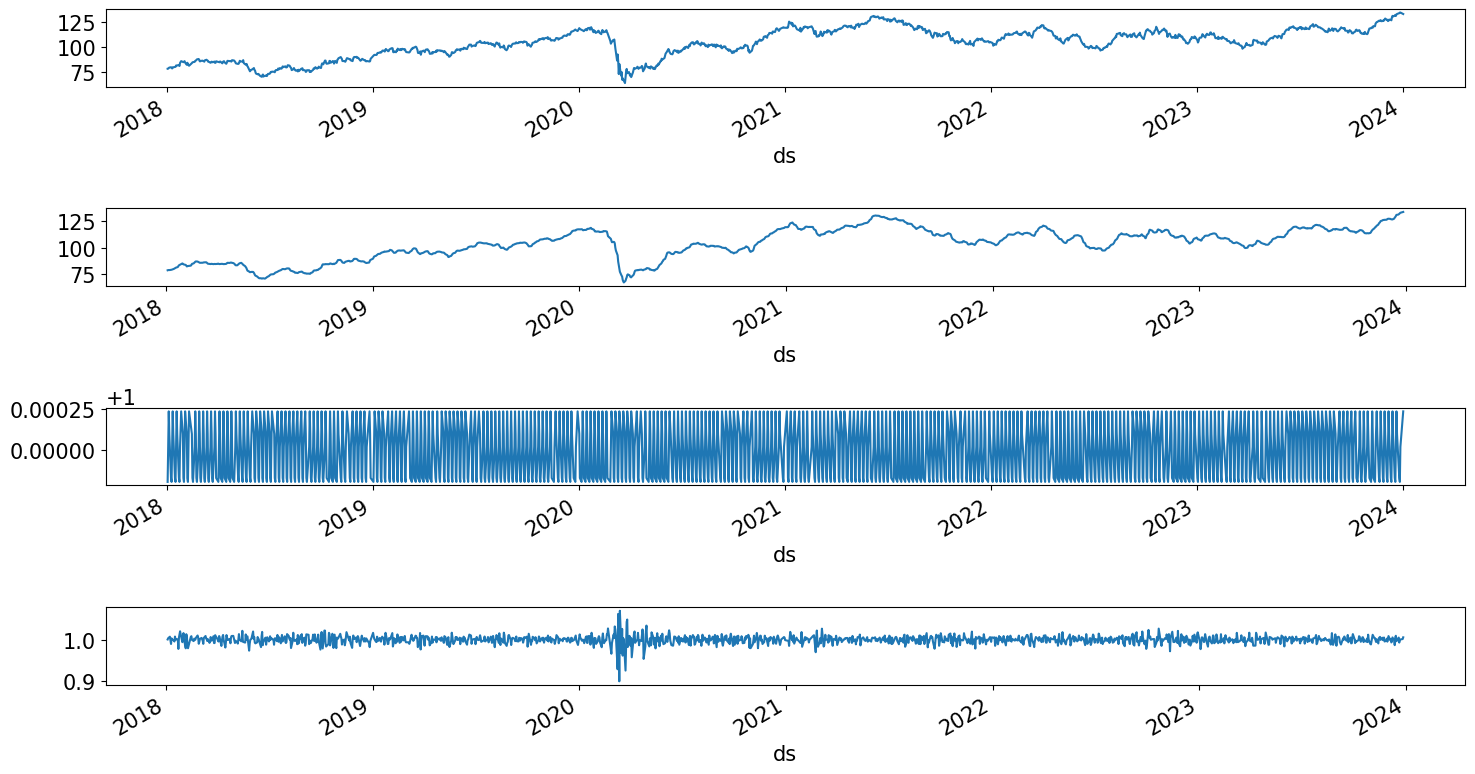

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonplot = seasonal_decompose(dados, model='multiplicative', period=5) #decomposing
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1) #original series
seasonplot.trend.plot(ax=ax2)    #tendency
seasonplot.seasonal.plot(ax=ax3) #seasonality
seasonplot.resid.plot(ax=ax4)    #residues or error
plt.tight_layout()

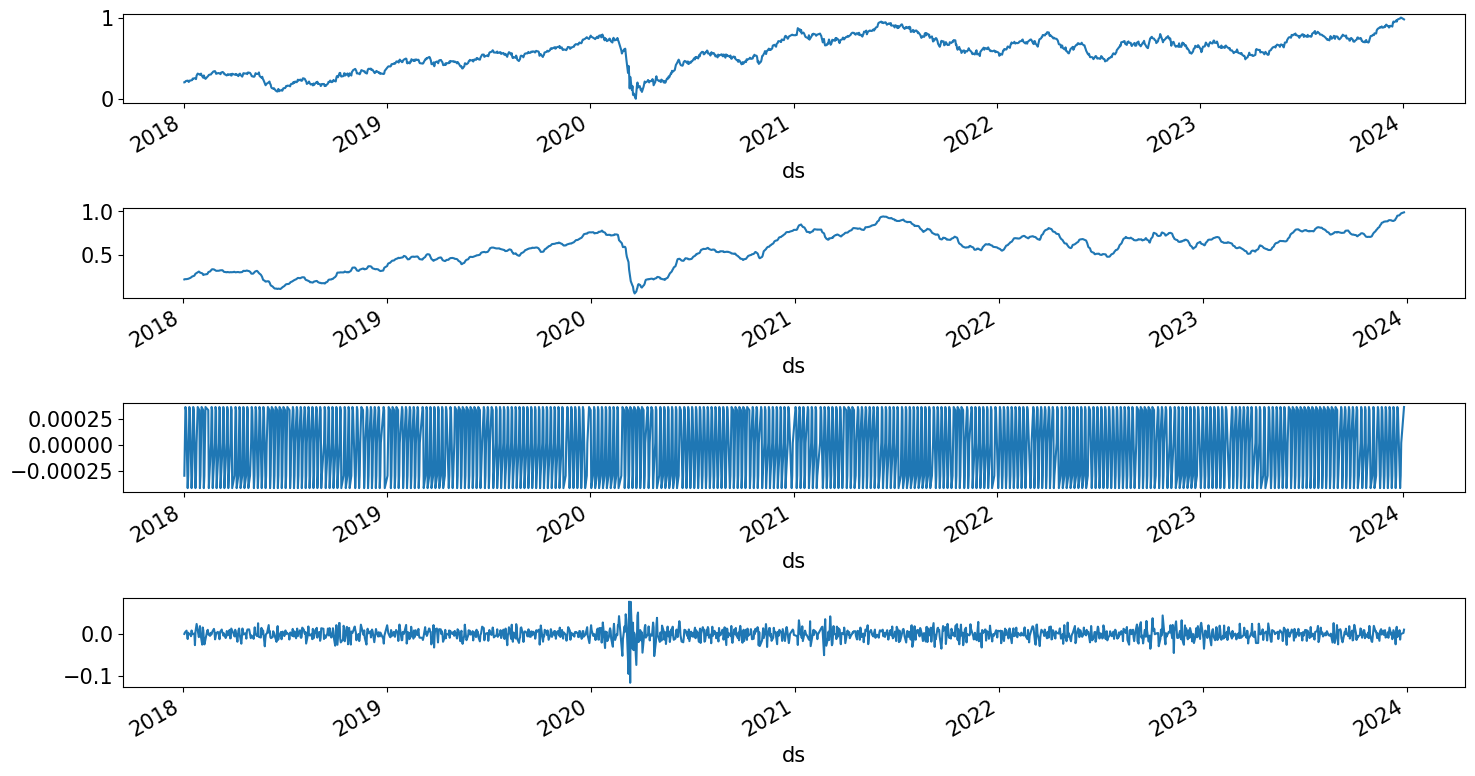

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonplot = seasonal_decompose(dados_normalized, model='aditive', period=5) #decomposing
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1)  #original series
seasonplot.trend.plot(ax=ax2)    #tendency
seasonplot.seasonal.plot(ax=ax3) #seasonality
seasonplot.resid.plot(ax=ax4)    #residues or error
plt.tight_layout()

We have some residue(or error, meaning some weird variance in our T-Series that is not like the previous ones) during the 2020-2021 period, and that also could be attributed to the COVID-19 pandemic. But, of course, there is some residue over the whole period chosen.

Now, **in terms of seasonality... we have no seasonality** - as Gru from Despicable Me would say(if he was a Data Scientist, I guess). Or at least, we have SO MUCH seasonality that we can't even consider a pattern for that feature. But life happens, that's expected for a T-Series from the stock market.

By the looks of it, we do not have a stationary series. But we should check statistically just to make sure!

**Testing for Stationarity with Augmented Dickey-Fuller test(or ADF test)**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dados_normalized)

print('ADF Statistics:', result[0])
print('p-value:', result[1])

print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistics: -2.343926231497324
p-value: 0.15819184677375053
Critical Values:
   1%: -3.434779131760461
   5%: -2.863496173799589
   10%: -2.5678114464207265


First of all, our p-value is 0.15, which itself is not the best of worlds, because it is not statistically significant. If it was 0.05 or less, then we could reject the null hyphotesis(in English: we don't have strong numbers to prove that our 'new' hyphotesis is 'the big deal'. It might mean that both the null and the new hyphotesis could be right, thus our analysis is not proven to be correct). In other words, the statistics aren't trustworthy when it comes to claiming it is stationary.

Secondly, while taking a look at our ADF Statistics, we have a -2.34, approximately. In order to trust our model is stationary(not considering the p-value on this one), one must see if this number is lesser than most of critical values(specially 10% and 5%). In our case, it is lesser than both 5% and 10%, but not 1%. Which is okay, really. The 1% would indicate that a series is *very-stationary*, something quite hard to happen.  

But hey, since our p-value is higher than 0.05, we should worry! That means that, even if we have pretty numbers in our statistics and critical values, we should do some work in our T-Series to make it REALLY stationary, for real.

**So, what do we do?**

Honestly, considering there are many evolving technologies and models out there that are very robust and adaptative, in this particular project we are NOT going with the classic models.

Buckle up, let's play around with some forecasting!

## Preprocessing our model

Let's define our train and test portions of the database, and check if there's anything that needs to be done(null values, check each and every column's type, etc)

In [ ]:
train = dados_normalized.sample(frac=0.8, random_state=0)
test = dados_normalized.sample(frac=0.2, random_state=0)
print('Train Shape: ', train.shape)
print('Test Shape: ', test.shape)

Train Shape:  (1190, 1)
Test Shape:  (298, 1)


Now we have 1190 rows for our training data(80% of the whole dataset), and 298 rows for our testing data(20% of the whole dataset). Sounds good.

In [ ]:
train.isnull().sum()

y    0
dtype: int64

In [ ]:
test.isnull().sum()

y    0
dtype: int64

We do not have null values. Cool! It means that, in this particular case, when importing our daily data from the website that contained the stock values, *it already excluded weekends and holidays*. Makes our lives easier!

Lastly, let's just check and see our dtypes, both for the 'y' column and 'index' column.

In [ ]:
train.dtypes

y    float64
dtype: object

In [ ]:
train.index

DatetimeIndex(['2023-12-15', '2022-08-01', '2020-04-20', '2022-02-07',
               '2020-02-19', '2022-08-29', '2021-08-09', '2018-08-23',
               '2021-02-24', '2023-04-18',
               ...
               '2020-10-09', '2022-11-14', '2020-04-01', '2021-01-21',
               '2021-02-18', '2020-08-25', '2020-03-05', '2019-05-27',
               '2019-10-25', '2019-03-14'],
              dtype='datetime64[ns]', name='ds', length=1190, freq=None)

In [ ]:
test.dtypes

y    float64
dtype: object

In [ ]:
test.index

DatetimeIndex(['2023-12-15', '2022-08-01', '2020-04-20', '2022-02-07',
               '2020-02-19', '2022-08-29', '2021-08-09', '2018-08-23',
               '2021-02-24', '2023-04-18',
               ...
               '2022-10-18', '2021-05-26', '2023-06-09', '2019-07-23',
               '2022-03-02', '2023-11-01', '2020-12-09', '2021-05-17',
               '2022-09-14', '2020-11-19'],
              dtype='datetime64[ns]', name='ds', length=298, freq=None)

Ok, 'y' column is a float64 one, and the index is, as expected, a DatetimeIndex. All good. We're good.

It is important to notice that we've already changed the columns' names to 'ds' and 'y' BECAUSE we felt like going for Prophet after all. These names are standard with this one, so we've already done most of the preprocessing way before, by dropping columns that we wouldn't use, for instance. Now we just checked to see if everything's at their own place. It looks like it!

## Prophet

In [ ]:
from prophet import Prophet

In [ ]:
model_prophet = Prophet()

Up in here, we have our initial instance(we created our model, and called the **Prophet()** function). Now, it comes with several *hyperparameters that could be tuned*. But some observations may apply. Firstly, in Prophet's very own [documentation](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) it is recommended to NOT tune some of the parameters, for you would have to change some others as well so you could find its best fit. Therefore I will stick with the standard configuration(except for the daily_seasonality one in the future, as you will get to see later). But it is very interesting to acknowledge some nice stuff that are out there, and specially one called '**changepoints**'. You see, in this specific database, we did NOT exclude the pandemic from our analysis. That is because we wanted to test the forecasting force of our models, even with some weird and out-of-nowhere events like a global crisis such as the COVID19 pandemic we've been through. Let's test the model, BUT if we find that the pandemic has taken a toll on our forecasting, we might use the *changepoints* hyperparameter to define a specific date in which something unusual happened, and that the model should "give it a little extra attention" before completing the forecasting. So that's very cool, indeed! Also, some other hyperparameters include defining holidays, weekly, monthly and yearly seasonality, among some other cool stuff. Let's stick with the basics.

So, by running our model.fit(train) code it returned an error that said we should have a column for 'ds' and another column for 'y'. Right now, our 'ds' column is, at the same time, our index. That only means we must reset our index, easy-peezy-lemon-squeezy.

In [ ]:
train = train.reset_index()

Let's do the same to our test dataframe.

In [ ]:
test = test.reset_index()

In [ ]:
model_prophet.fit(train)
dataFramefuture = model_prophet.make_future_dataframe(periods=10, freq='D')
prediction = model_prophet.predict(dataFramefuture)
prediction.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/0say1vlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/wiop6c4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78834', 'data', 'file=/tmp/tmppj5quxzm/0say1vlf.json', 'init=/tmp/tmppj5quxzm/wiop6c4m.json', 'output', 'file=/tmp/tmppj5quxzm/prophet_model937b5m09/prophet_model-20240630145451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,0.183797,0.095990,0.352147,0.183797,0.183797,0.047056,0.047056,0.047056,-0.004761,-0.004761,-0.004761,0.051817,0.051817,0.051817,0.0,0.0,0.0,0.230853
1,2018-01-03,0.184336,0.101101,0.357985,0.184336,0.184336,0.049259,0.049259,0.049259,-0.003277,-0.003277,-0.003277,0.052536,0.052536,0.052536,0.0,0.0,0.0,0.233595
2,2018-01-04,0.184875,0.105064,0.369174,0.184875,0.184875,0.050639,0.050639,0.050639,-0.002742,-0.002742,-0.002742,0.053381,0.053381,0.053381,0.0,0.0,0.0,0.235513
3,2018-01-05,0.185413,0.109646,0.367550,0.185413,0.185413,0.051759,0.051759,0.051759,-0.002587,-0.002587,-0.002587,0.054346,0.054346,0.054346,0.0,0.0,0.0,0.237172
4,2018-01-10,0.188108,0.114224,0.373766,0.188108,0.188108,0.057298,0.057298,0.057298,-0.003277,-0.003277,-0.003277,0.060575,0.060575,0.060575,0.0,0.0,0.0,0.245406


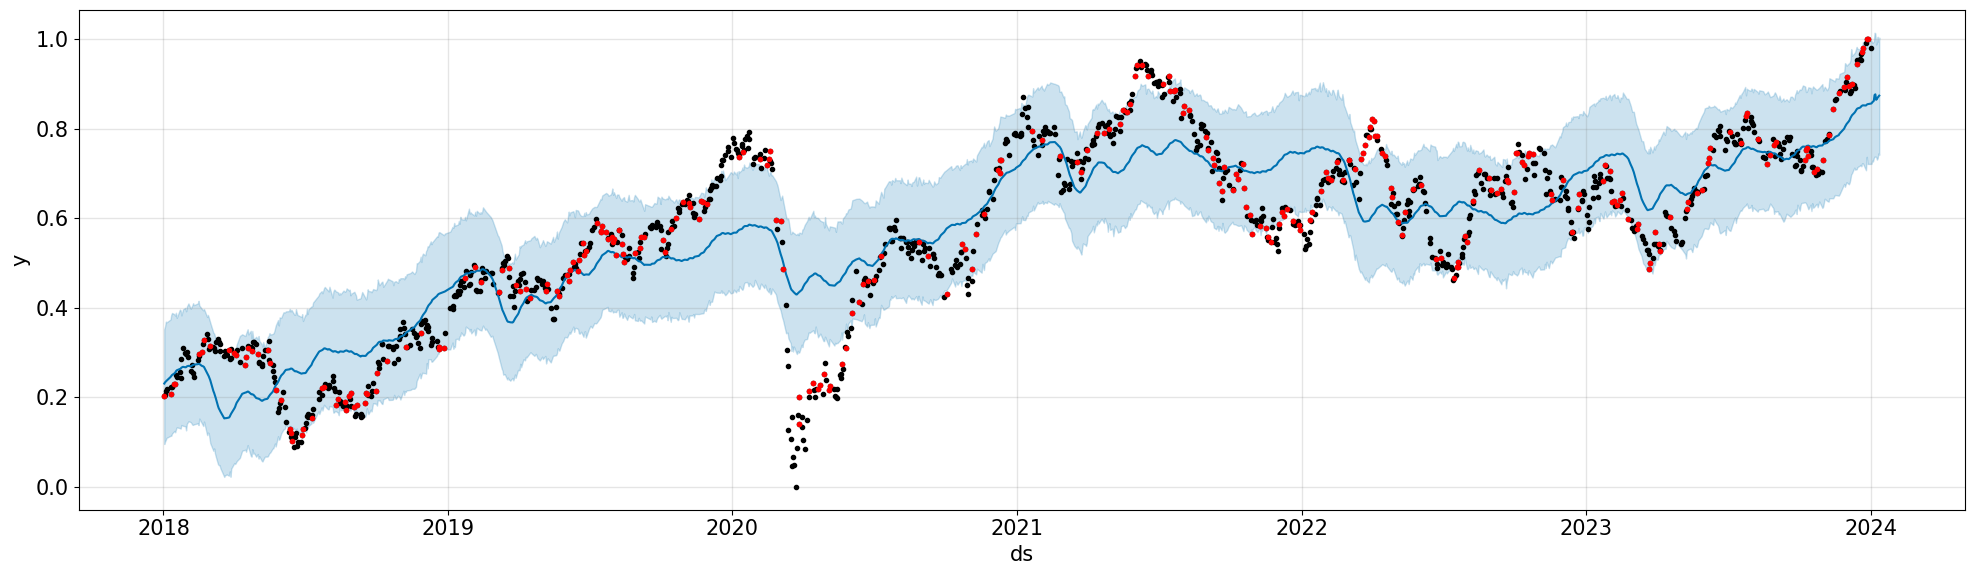

In [ ]:
model_prophet.plot(prediction, figsize=(20,6));
plt.plot(test['ds'], test['y'], '.r')

In [ ]:
import numpy as np

pred = ['ds', 'yhat']
true = ['ds', 'y']

prediction = prediction[pred]
true_values = train[true]

# Merging the results into a single dataframe
results = pd.merge(prediction, true_values, on='ds', how='inner')
results = results[results['y'] != 0]

# Calculating for real the error using NumPy
results['a_p_e'] = np.abs((results['y'] - results['yhat']) / results['y']) * 100

# MAPE
mape = np.mean(results['a_p_e'])

print(f"MAPE: {mape}%")

MAPE: 22.033615698161015%


So, we've tried many things and the final MAPE in our model was 22.03%. Now, we'll try one more thing in order to enhance our model, and let's see how it goes.

In this try, we just changed our fraction of the dataset that is meant for training, and reduced the testing amount. So now it is 90% train, and 10% test.

In [ ]:
train = dados_normalized.sample(frac=0.9, random_state=0)
test = dados_normalized.sample(frac=0.1, random_state=0)
print('Train Shape: ', train.shape)
print('Test Shape: ', test.shape)

Train Shape:  (1339, 1)
Test Shape:  (149, 1)


In [ ]:
train = train.reset_index()
test = test.reset_index()
model1_prophet = Prophet(daily_seasonality=True)
model1_prophet.fit(train)
dataFramefuture = model1_prophet.make_future_dataframe(periods=10, freq='D')
prediction = model1_prophet.predict(dataFramefuture)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/4fvuovg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/_ei5hlse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77853', 'data', 'file=/tmp/tmppj5quxzm/4fvuovg9.json', 'init=/tmp/tmppj5quxzm/_ei5hlse.json', 'output', 'file=/tmp/tmppj5quxzm/prophet_modelnswv6av0/prophet_model-20240630145454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


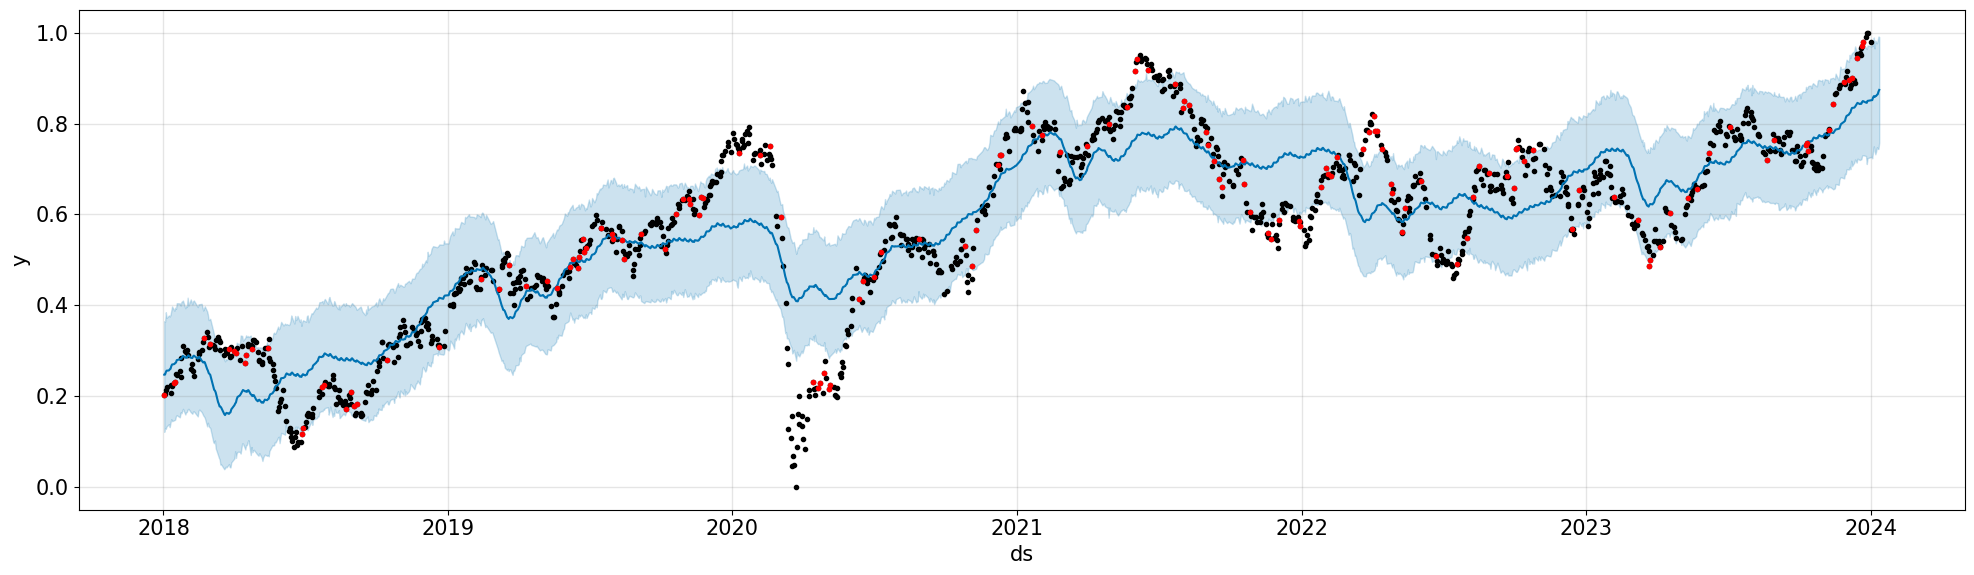

In [ ]:
model_prophet.plot(prediction, figsize=(20,6));
plt.plot(test['ds'], test['y'], '.r')

In [ ]:
import numpy as np

pred = ['ds', 'yhat']
true = ['ds', 'y']

prediction = prediction[pred]
true_values = train[true]

# Merging the results into a single dataframe
results = pd.merge(prediction, true_values, on='ds', how='inner')
results = results[results['y'] != 0]

# Calculating for real the error using NumPy
results['a_p_e'] = np.abs((results['y'] - results['yhat']) / results['y']) * 100

# MAPE
mape = np.mean(results['a_p_e'])

print(f"MAPE: {mape}%")

MAPE: 19.679322820730693%


So, we've got a MAPE of 20.04%(you can't see it, because we now changed our daily_seasonality to True, so it decreased to 19.67). It's slightly better, but not the best. Last chance: using the pandemic date to see if helps(changepoints).

In [ ]:
model2_prophet = Prophet(daily_seasonality=True, changepoints=['2020-01-30'])
model2_prophet.fit(train)
dataFramefuture = model2_prophet.make_future_dataframe(periods=10, freq='D')
prediction = model2_prophet.predict(dataFramefuture)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/4yosd2pf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/hamb6ufy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72631', 'data', 'file=/tmp/tmppj5quxzm/4yosd2pf.json', 'init=/tmp/tmppj5quxzm/hamb6ufy.json', 'output', 'file=/tmp/tmppj5quxzm/prophet_modelrt15c1if/prophet_model-20240630145501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


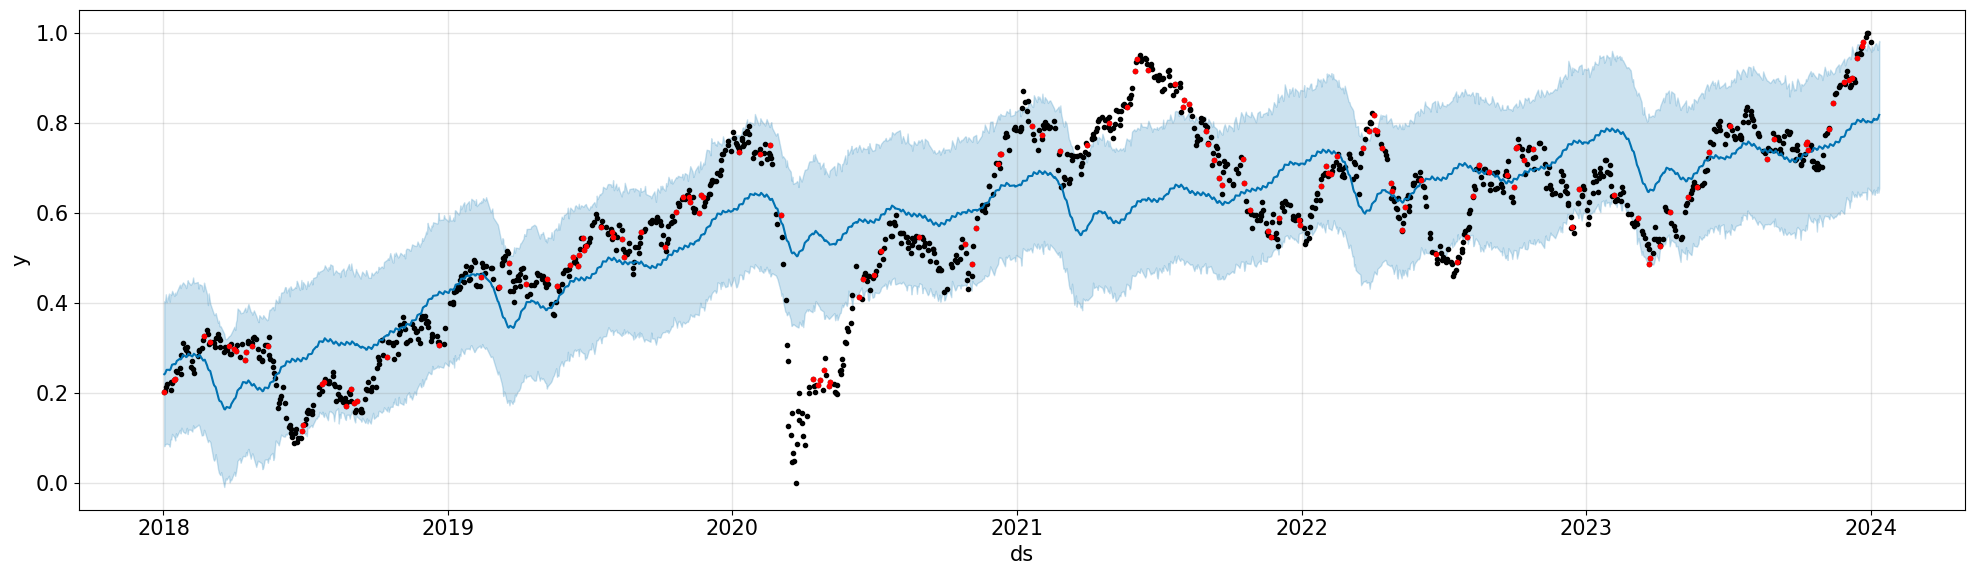

In [ ]:
model_prophet.plot(prediction, figsize=(20,6));
plt.plot(test['ds'], test['y'], '.r')

In [ ]:
import numpy as np

pred = ['ds', 'yhat']
true = ['ds', 'y']

prediction = prediction[pred]
true_values = train[true]

# Merging the results into a single dataframe
results = pd.merge(prediction, true_values, on='ds', how='inner')
results = results[results['y'] != 0]

# Calculating for real the error using NumPy
results['a_p_e'] = np.abs((results['y'] - results['yhat']) / results['y']) * 100

# Calcular o MAPE
mape = np.mean(results['a_p_e'])

print(f"MAPE: {mape}%")

MAPE: 26.01452324542442%


So, by adding the changepoints with the min value(the date was equivalent to the mininum stock value ever registred in our period of time) the error actually increased(26.01%). Then, we tried some prior date to see if it helped(January, 30th), but it *did not*. So, something came to our minds, and it's the last-last-attempt ever in this model. Let's remove the *min_max_scaler* normalizer we did before. In theory, it should not change a thing, but hey, let's give it a try.

In [ ]:
train = dados.sample(frac=0.9, random_state=0)
test = dados.sample(frac=0.1, random_state=0)

In [ ]:
train = train.reset_index()
test = test.reset_index()

In [ ]:
model3_prophet = Prophet(daily_seasonality=True)
model3_prophet.fit(train)
dataFramefuture = model3_prophet.make_future_dataframe(periods=10, freq='D')
prediction = model3_prophet.predict(dataFramefuture)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/9qd2q9ge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppj5quxzm/lcd8_fpd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53225', 'data', 'file=/tmp/tmppj5quxzm/9qd2q9ge.json', 'init=/tmp/tmppj5quxzm/lcd8_fpd.json', 'output', 'file=/tmp/tmppj5quxzm/prophet_modeltb04fbik/prophet_model-20240630145504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


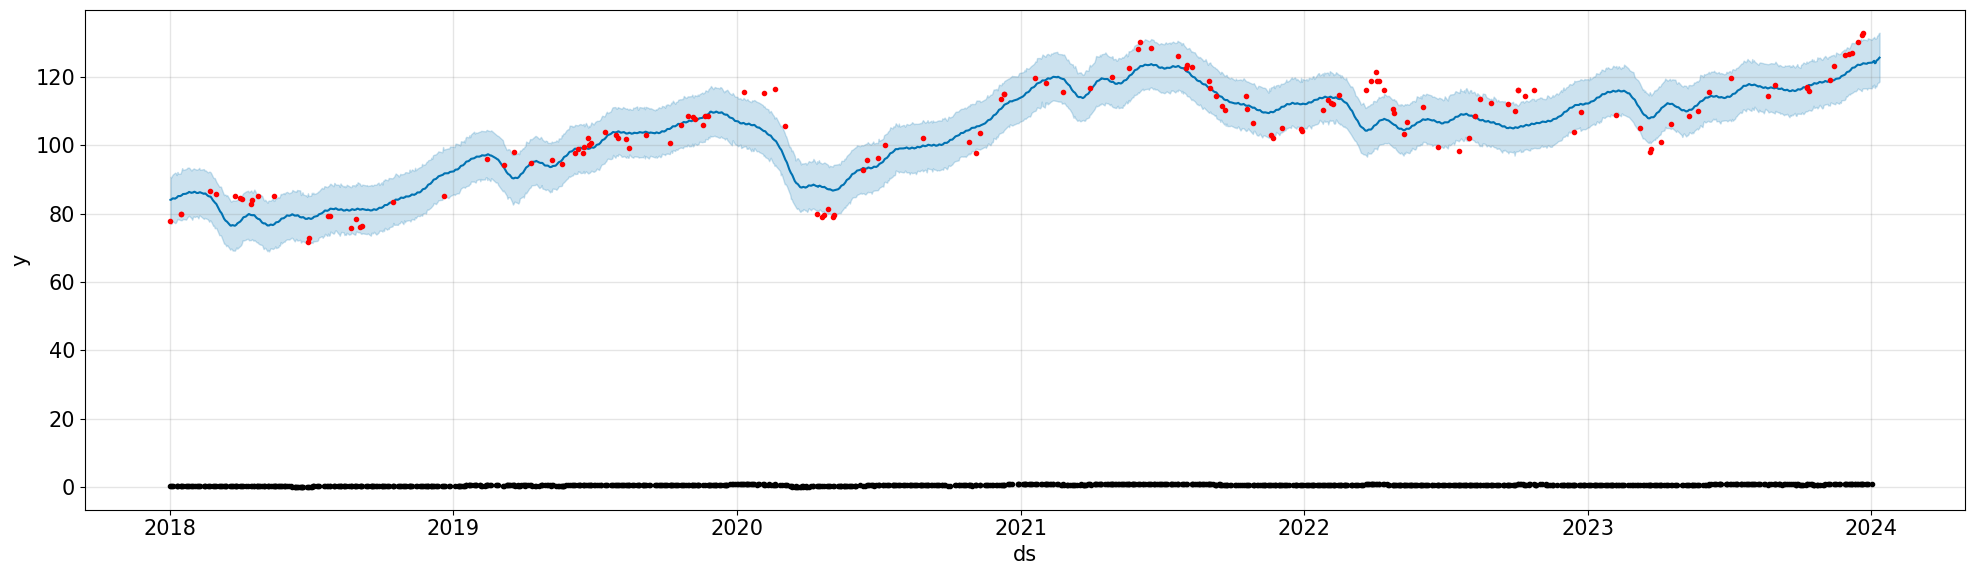

In [ ]:
model_prophet.plot(prediction, figsize=(20,6));
plt.plot(test['ds'], test['y'], '.r')

In [ ]:
import numpy as np
# Extrair as colunas relevantes dos DataFrames
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

prediction = prediction[previsao_cols]
valores_reais = train[valores_reais_cols]

# Mesclar os DataFrames nas colunas 'ds' para comparar previsões e valores reais
resultados = pd.merge(prediction, valores_reais, on='ds', how='inner')
resultados = resultados[resultados['y'] != 0]
# Calcular o erro percentual absoluto para cada ponto de dados
resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

# Calcular o MAPE
mape = np.mean(resultados['erro_percentual_absoluto'])

print(f"MAPE: {mape}%")

MAPE: 4.33097758040084%


Holy-Molly! It worked! Oh boy, how wrong we were. Apparently, the min_max_scaler work we applied before *did our model wrong*. We got a pretty neat result now! According to the Prophet's documentation, the database already gets treated when passing by the library, so that's why our Min_Max_Scaler was unhelpful here. We normalized it twice, which may have flattened the profile of our T-Series.

In the end, our best result was the latest one, with a Mean Absolute Percentage Error of 4,33%.